In [1]:
import numpy as np
from sklearn.decomposition import NMF
import common_functions as cf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st

In [2]:

data = [[np.array([np.nan, np.inf, 3, np.nan, 5, -np.inf]), [1, 2, 3, 4, 5, 6]], [np.array([np.nan, np.inf, 3, np.nan, 5, -np.inf]), [1, 2, 3, 4, 5, 6]]]
print(data)
print(data[0][0])
print(isinstance(data[0][0], list))
data = cf.pure_list(data)
print(data)
print(data[0][0])
print(isinstance(data[0][0], list))

[[array([ nan,  inf,   3.,  nan,   5., -inf]), [1, 2, 3, 4, 5, 6]], [array([ nan,  inf,   3.,  nan,   5., -inf]), [1, 2, 3, 4, 5, 6]]]
[ nan  inf   3.  nan   5. -inf]
False
[[[nan, inf, 3.0, nan, 5.0, -inf], [1, 2, 3, 4, 5, 6]], [[nan, inf, 3.0, nan, 5.0, -inf], [1, 2, 3, 4, 5, 6]]]
[nan, inf, 3.0, nan, 5.0, -inf]
True


In [3]:
data = [np.array([np.nan, np.inf, 3, np.nan, 5, -np.inf]), np.array([1, 2, 3, 4, 5, 6])]
# data = pd.DataFrame(data)
print(cf.sync_special_value_array(data, sync_axis=0))
print(data)

[[nan, nan, 3.0, nan, 5.0, nan], [nan, nan, 3.0, nan, 5.0, nan]]
[array([ nan,  inf,   3.,  nan,   5., -inf]), array([1, 2, 3, 4, 5, 6])]


In [4]:
data = [np.nan, np.inf, 3, np.nan, 5, -np.inf]
data = np.array(data)
# data = pd.Series([np.nan, np.inf, 3, np.nan, 5, -np.inf])
print(cf.process_special_value(data, nan_policy='interpolate', inf_policy='to_nan'))
print(cf.process_special_value(data, nan_policy='fill', inf_policy='to_nan'))
print(cf.process_special_value(data, nan_policy='fill', inf_policy='ignore'))
print(cf.process_special_value(data, nan_policy='propagate', inf_policy='to_nan'))
print(cf.process_special_value(data, nan_policy='drop', inf_policy='ignore'))


[nan nan  3.  4.  5.  5.]
[0. 0. 3. 0. 5. 0.]
[  0.  inf   3.   0.   5. -inf]
[nan nan  3. nan  5. nan]
[ inf   3.   5. -inf]


In [5]:
x = [1, 2, 3, 4, 5, 4.4]
y = [1, 2.1, 3, 4, 5, 6]
cf.sync_special_value(x, y)
print(cf.get_corr(x, y))
print(np.corrcoef(x, y))

0.9454235451559542
[[1.         0.94542355]
 [0.94542355 1.        ]]


In [6]:
# T = 0.1
# t = np.arange(0, 100, T)
# # timeseries = np.sin(2 * np.pi * t) + np.sin(2 * np.pi * t * 2) + np.cos(2 * np.pi * t * 3)
# timeseries_0 = np.exp(-t)
# timeseries_1 = np.sin(2 * np.pi * t) * np.exp(-t)
# # timeseries[20:21] = np.nan  # 引入NaNs
# # timeseries[50] = np.inf  # 引入Inf

T = 1
t = np.arange(0, 100, T)
timeseries_0 = [True] * 99 + [False] * 1
timeseries_1 = [True] * 25 + [False] * 25 + [True] * 25 + [False] * 25

# 测试 perform_fft
xf_0, yf_0 = cf.perform_fft(timeseries_0, T)
xf_1, yf_1 = cf.perform_fft(timeseries_1, T)

print(np.sum(yf_0))
print(np.sum(yf_1))

# 测试 get_acf
acf_t_0, acf_result_0 = cf.cal_acf(timeseries_0, T, nlags=25)
acf_t_1, acf_result_1 = cf.cal_acf(timeseries_1, T, nlags=25)

print(np.array([timeseries_0, timeseries_1]).shape)
acf_t, multi_acf = cf.cal_multi_acf(np.array([timeseries_0, timeseries_1]), T, nlags=25)
print(multi_acf.shape)
acf_t_0 = acf_t
acf_t_1 = acf_t
acf_result_0 = multi_acf[0]
acf_result_1 = multi_acf[1]

fig, ax = cf.create_fig_ax(1, 3)
cf.plt_line_plot(ax[0], t, timeseries_0, label='exp(-t)', color=cf.DEFAULT_BLUE)
cf.plt_line_plot(ax[0], t, timeseries_1, label='sin(2*pi*t)*exp(-t)', color=cf.DEFAULT_GREEN)
cf.set_ax(ax[0], x_label='Time', y_label='Amplitude', title='Time series', xlim=[0, 2*np.pi])
cf.plt_line_plot(ax[1], xf_0, yf_0, label='exp(-t)', color=cf.DEFAULT_BLUE)
cf.plt_line_plot(ax[1], xf_1, yf_1, label='sin(2*pi*t)*exp(-t)', color=cf.DEFAULT_GREEN)
cf.set_ax(ax[1], x_label='Frequency', y_label='Amplitude', title='FFT')
cf.plt_stem_plot(ax[2], acf_t_0, acf_result_0, label='exp(-t)', markercolor=cf.DEFAULT_BLUE, linecolor=cf.DEFAULT_BLUE)
cf.plt_stem_plot(ax[2], acf_t_1, acf_result_1, label='sin(2*pi*t)*exp(-t)', markercolor=cf.DEFAULT_GREEN, linecolor=cf.DEFAULT_GREEN)
cf.set_ax(ax[2], x_label='Lag', y_label='ACF', title='ACF')

AttributeError: module 'common_functions' has no attribute 'perform_fft'

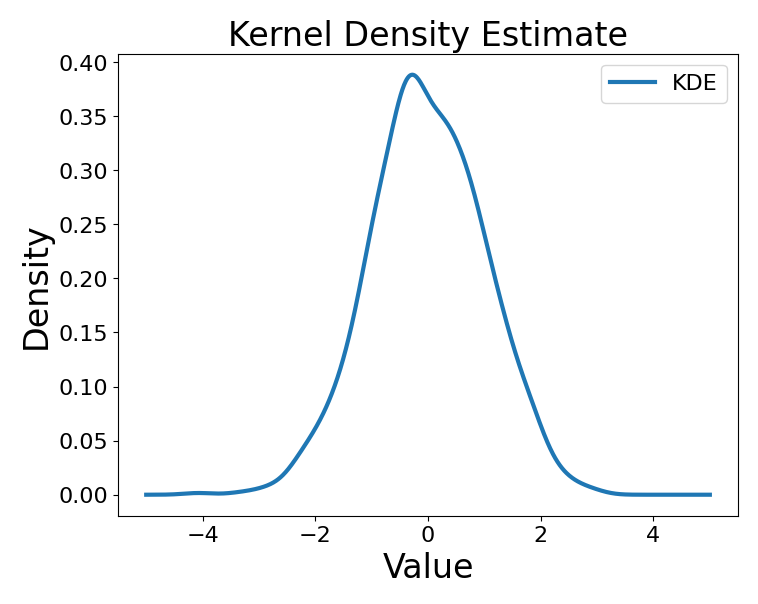

In [ ]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import common_functions as cf

# 生成随机测试数据
data = np.random.normal(loc=0, scale=1, size=1000)

# 生成 KDE 对象
kde = cf.get_kde(data)

# 准备绘图数据
x_grid = np.linspace(-5, 5, 1000)
kde_values = kde(x_grid)

# 绘制 KDE 图
plt.figure(figsize=(8, 6))
plt.plot(x_grid, kde_values, label='KDE')
plt.title('Kernel Density Estimate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
